In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir dataset

In [ ]:
!kaggle datasets download -d denizkavi1/brain-tumor

100% 699M/700M [00:35<00:00, 21.4MB/s]
100% 700M/700M [00:35<00:00, 20.9MB/s]


In [ ]:
! unzip /content/brain-tumor.zip -d dataset

In [ ]:
!pip install hugsvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 119.2 MB/s eta 0:00:00


In [ ]:
%cd '/content/dataset'
%ls -la


/content/dataset
total 88
drwxr-xr-x 5 root root  4096 Feb  1 22:06 ./
drwxr-xr-x 1 root root  4096 Feb  1 22:05 ../
drwxr-xr-x 2 root root 20480 Feb  1 22:06 1/
drwxr-xr-x 2 root root 36864 Feb  1 22:06 2/
drwxr-xr-x 2 root root 24576 Feb  1 22:06 3/


In [ ]:
import os
# print(os.listdir('/content/dataset'))
# os.rmdir('/content/dataset/.ipynb_checkpoints')
print(os.listdir('/content/dataset'))
from hugsvision.dataio.VisionDataset import VisionDataset
import torch,torchvision
from torchvision import transforms

transform= transforms.Compose([transforms.Resize((223,223) ,interpolation=torchvision.transforms.InterpolationMode.BICUBIC)])
train, test, id2label, label2id = VisionDataset.fromImageFolder(
  "/content/dataset",
  test_ratio   = 0.2,
  balanced     =False,
  augmentation = True,
  transform =transform


)
print(train)

['2', '3', '1']


AttributeError: ignored

In [ ]:
huggingface_model = 'facebook/deit-base-distilled-patch16-224' #facebook/deit-base-distilled-patch16-384' # 'google/vit-base-patch16-224-in21k'
from hugsvision.nnet.VisionClassifierTrainer import VisionClassifierTrainer
from transformers import ViTFeatureExtractor, ViTForImageClassification

trainer = VisionClassifierTrainer(
	model_name   = "Vitmodel",
	train        = train,
	test         = test,
	output_dir   = "/content/drive/MyDrive/VIT_models",
	max_epochs   = 20,
	batch_size   = 32, # On RTX 2080 Ti
	lr	     = 2e-5,
	fp16	     = True,
	model = ViTForImageClassification.from_pretrained(
	    huggingface_model,
	    num_labels = len(label2id),
	    label2id   = label2id,
	    id2label   = id2label
	),
	feature_extractor = ViTFeatureExtractor.from_pretrained(
		huggingface_model,
	),
)

You are using a model of type deit to instantiate a model of type vit. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at facebook/deit-base-distilled-patch16-224 were not used when initializing ViTForImageClassification: ['deit.encoder.layer.10.attention.attention.value.bias', 'deit.encoder.layer.2.attention.attention.query.weight', 'deit.encoder.layer.4.attention.attention.key.weight', 'deit.encoder.layer.11.attention.attention.value.weight', 'deit.encoder.layer.8.attention.attention.value.bias', 'deit.encoder.layer.6.attention.attention.query.weight', 'deit.encoder.layer.3.layernorm_after.bias', 'deit.encoder.layer.6.layernorm_after.bias', 'deit.encoder.layer.3.attention.output.dense.bias', 'deit.encoder.layer.9.output.dense.bias', 'deit.encoder.layer.11.attention.attention.query.bias', 'deit.encoder.layer.0.attention.output.dense.bias', 'deit.embeddings.position_embeddings', 'deit.encoder.layer.5.attention.attention.

{'0': '1', '1': '2', '2': '3'}
{'1': '0', '2': '1', '3': '2'}


Using cuda_amp half precision backend
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2451
  Num Epochs = 20
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1540
  Number of trainable parameters = 85800963


Trainer builded!
Start Training!


ValueError: ignored

In [ ]:
ref, hyp = trainer.evaluate_f1_score()

100%|██████████| 425/425 [00:15<00:00, 27.14it/s]

              precision    recall  f1-score   support

           1     0.9533    0.9346    0.9439       153
           2     0.9400    0.9592    0.9495       147
           3     0.9760    0.9760    0.9760       125

    accuracy                         0.9553       425
   macro avg     0.9564    0.9566    0.9565       425
weighted avg     0.9554    0.9553    0.9553       425

Logs saved at: /content/drive/MyDrive/VIT_models/VITMODEL/20_2023-02-01-22-24-43


In [ ]:

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(ref,hyp) *100
print(acc)

cm = confusion_matrix(ref, hyp)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (5,5))
plt.title("Confusion Matraix with Accuracy {} %".format(str(acc)[0:5]))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="",cmap= plt.cm.CMRmap)
plt.savefig("/content/drive/MyDrive/VIT_models/conf_matrix_3.jpg")


95.52941176470588


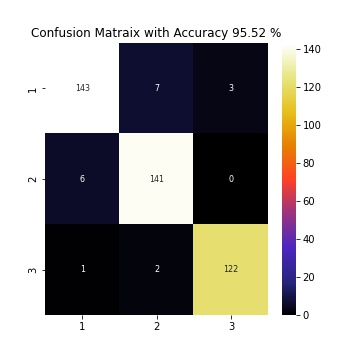

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

conf = cv2.imread("/content/drive/MyDrive/VIT_models/conf_matrix_3.jpg")
plt.figure()
cv2_imshow(conf)